In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from arch.univariate import GARCH, ConstantMean, SkewStudent, Normal
from arch import arch_model
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from scipy.stats import norm
import seaborn as sns
import time 

In [18]:
# Configuración general de gráficos
sns.set_style("white")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [19]:
#Escribe una forma determinista para la seed segun trayectoria
def seed_dist(i):
    return [i,i**2,i+1,int(np.sqrt(i))]

In [20]:
#Calcula la acf teorica de un garch(1,1)
def acf_garch(a,b,h):
    # h>=1
    # a: alpha
    # b: beta
    p_1 = a*(1-b*(a+b))/(1-(a+b)**2+a**2) 
    p_h = p_1 *(a+b)**(h-1)
    return p_h

In [21]:
#Simula n series garch(1,1) con m datos y le calcula la acf a cada una para luego promediarla
def sim_garch(n,m,a,b,omega):
    # n: numero de series simuladas
    # m: datos de la serie a simular
    # omega : omega
    sim_mod = arch_model(None, p=1, o=0, q=1)
    params = {"mu":0,"omega": omega,"alpha[1]":a,"beta[1]":b}
    param = pd.Series(params)
    np.random.seed(69)
    datos_simulados = []
    for i in range(n):
        seedd = seed_dist(i)
        rs = np.random.RandomState(seedd)
        sim_mod.distribution = Normal(seed=rs)
        sim_data = sim_mod.simulate(param, m) #1000000
        datos_simulados.append(sim_data["data"])
    
    
    acfs = []
    for i in range(n):
        acfs.append(acf(np.square(datos_simulados[i]),nlags = 20))
    
    df = pd.DataFrame(acfs, columns=np.arange(0, 21))
    acf_mean = df.mean()
    acf_teory_1 = []
    acf1 = acf_mean[1:20]
    for i in range(1,20):
        acf_teory_1.append(acf_garch(a,b,i))
    
    return acf1,acf_teory_1

# Obtencion de datos, que es más costoso computacionalmente, obtener 1 serie con 100000 datos o 100 con 1000

In [22]:
rs = np.random.RandomState([1,2,3,4])
params = {"mu":0,"omega": 0.1,"alpha[1]":0.3,"beta[1]":0.4}
param = pd.Series(params)
sim_mod = arch_model(None, p=1, o=0, q=1)
sim_mod.distribution = Normal(seed=rs)

In [23]:
time_dif = []
for j in range(100):
    start_time1 = time.time()
    sim_data = sim_mod.simulate(param, 100000)
    end_time1 = time.time()
    elapsed_time1 = end_time1 - start_time1
    
    start_time2 = time.time()
    for i in range(100):
        sim_data = sim_mod.simulate(param, 1000)
    end_time2 = time.time()
    elapsed_time2 = end_time2 - start_time2
    time_dif.append(elapsed_time2/elapsed_time1)

In [24]:
np.mean(np.array(time_dif))

2.040650520049835

Como se puede ver es más costoso generar más series que cantidad de datos para una solo serie, esto es importante para cuidar los recursos computacionales en la obtención de datos, por lo anterior primero partiemos con 1 serie

# Simularemos 1 serie, con distintos parametros y veremos su ACF según la cantidad de datos

$\alpha = 0.2$ y $\beta = 0.3$

In [25]:
#Calcularemos los primeros 19 lags 
x = np.arange(1,20)
alpha = 0.2
beta = 0.3
omega = 0.1
n=1

In [26]:
a =["1000","1.000"]

In [27]:
print("2 ="+" "+a[1])

2 = 1.000


In [28]:
acf_m = []
acf_t = []
acf11 = []
acf11t = []
m=[500,1000,10000,100000]
for i in range(len(m)):
    acfm,acft = sim_garch(n,m[i],alpha,beta,omega)
    acf11.append(acfm)
    acf11t.append(acft)
    acf_m.append(acfm)
    acf_t.append(acft)


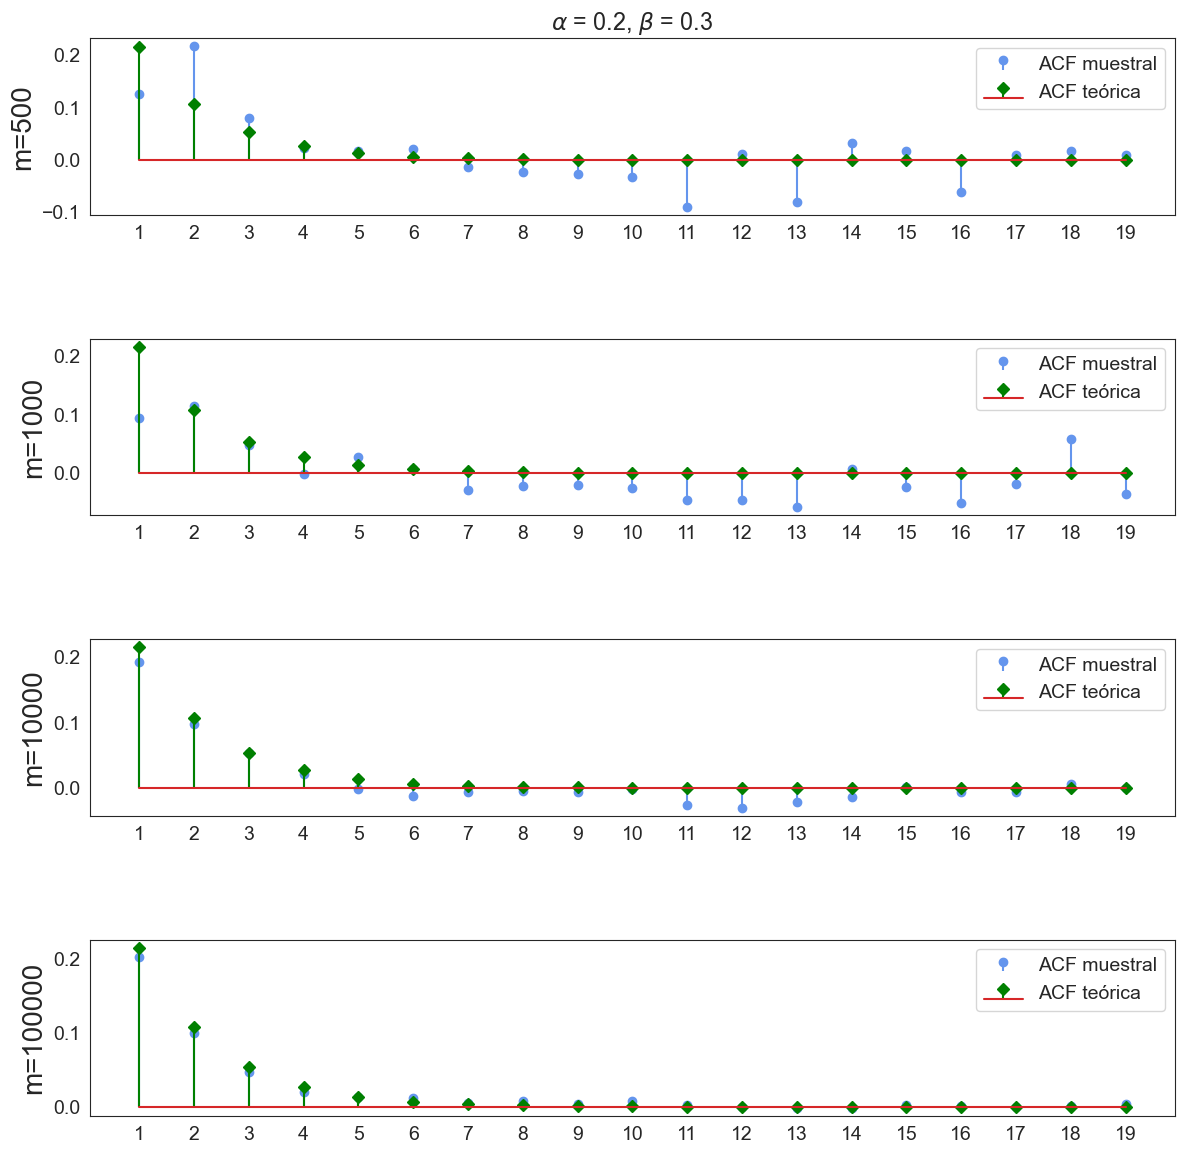

In [29]:
fig, axes = plt.subplots(4,1, figsize=(14, 14))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.7) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt = 'cornflowerblue',basefmt=' ',  label = "ACF muestral")
    ax.stem(acf_t[i],linefmt = 'green',  label='ACF teórica', markerfmt = 'D')
    if i==0:
        ax.set_title(fr'$\alpha$ = {alpha}, $\beta$ = {beta}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    ax.set_ylabel(fr'm={m[i]}', fontsize=20)
    i=i+1

$\alpha = 0.4$ y $\beta = 0.4$

In [30]:
x = np.arange(1,20)
alpha = 0.4
beta = 0.4
omega = 0.1
n=1

In [31]:
dis = []

In [32]:
acf_m = []
acf_t = []
acf44 = []
acf44t = []
m=[500,1000,10000,100000]
for i in range(len(m)):
    acfm,acft = sim_garch(n,m[i],alpha,beta,omega)
    acf44.append(acfm)
    acf44t.append(acft)
    acf_m.append(acfm)
    acf_t.append(acft)
    dis.append(np.linalg.norm(acfm-acft))

In [33]:
np.linalg.norm(acfm-acft)

0.1928922716261002

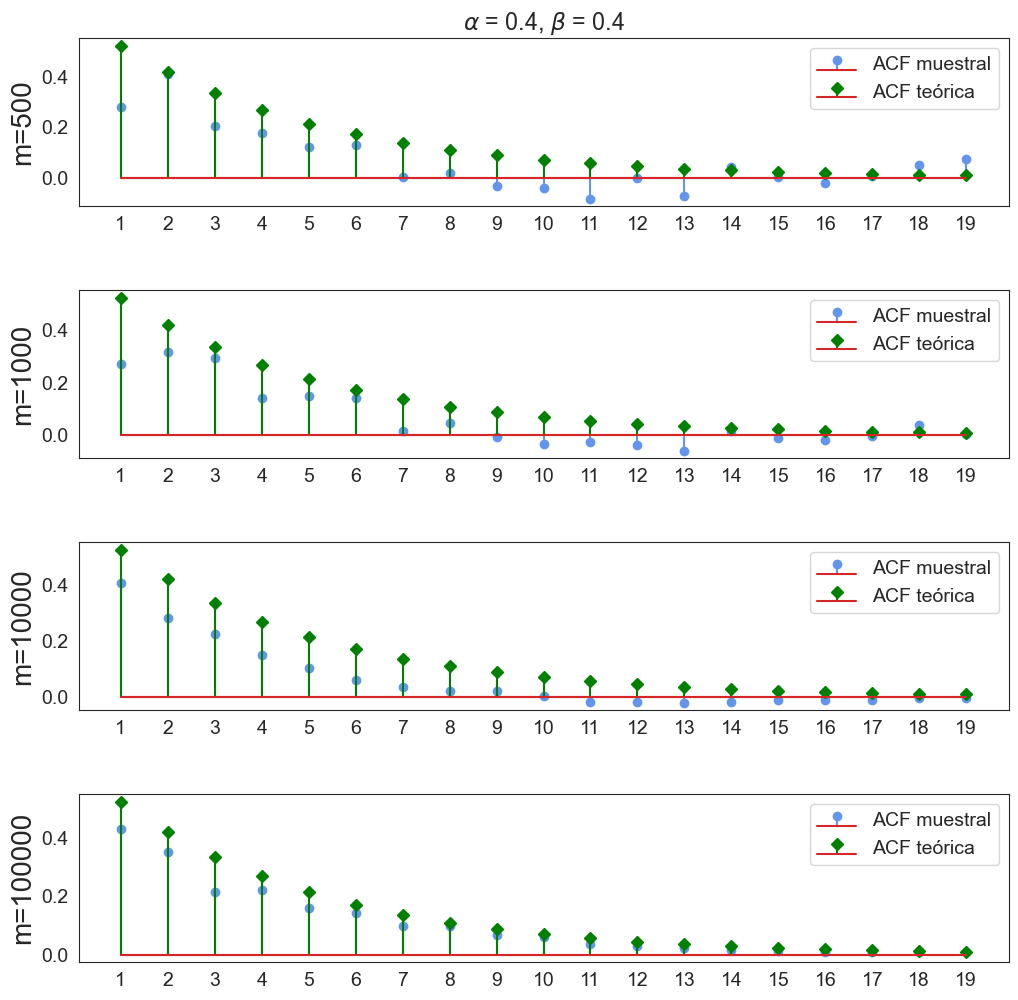

In [34]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt = 'cornflowerblue',  label = "ACF muestral")
    ax.stem(acf_t[i],linefmt = 'green',  label='ACF teórica', markerfmt = 'D')
    if i==0:
        ax.set_title(fr'$\alpha$ = {alpha}, $\beta$ = {beta}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    ax.set_ylabel(fr'm={m[i]}', fontsize=20)
    i=i+1

In [35]:
dis

[0.436312369329425,
 0.39778020818522164,
 0.35834051907484565,
 0.1928922716261002]

$\alpha = 0.8$ y $\beta = 0.05$

In [36]:
x = np.arange(1,20)
alpha = 0.8
beta = 0.05
omega = 0.1
n=1

In [37]:
acf_m = []
acf_t = []
m=[500,1000,10000,100000]
for i in range(len(m)):
    acfm,acft = sim_garch(n,m[i],alpha,beta,omega)
    acf_m.append(acfm)
    acf_t.append(acft)

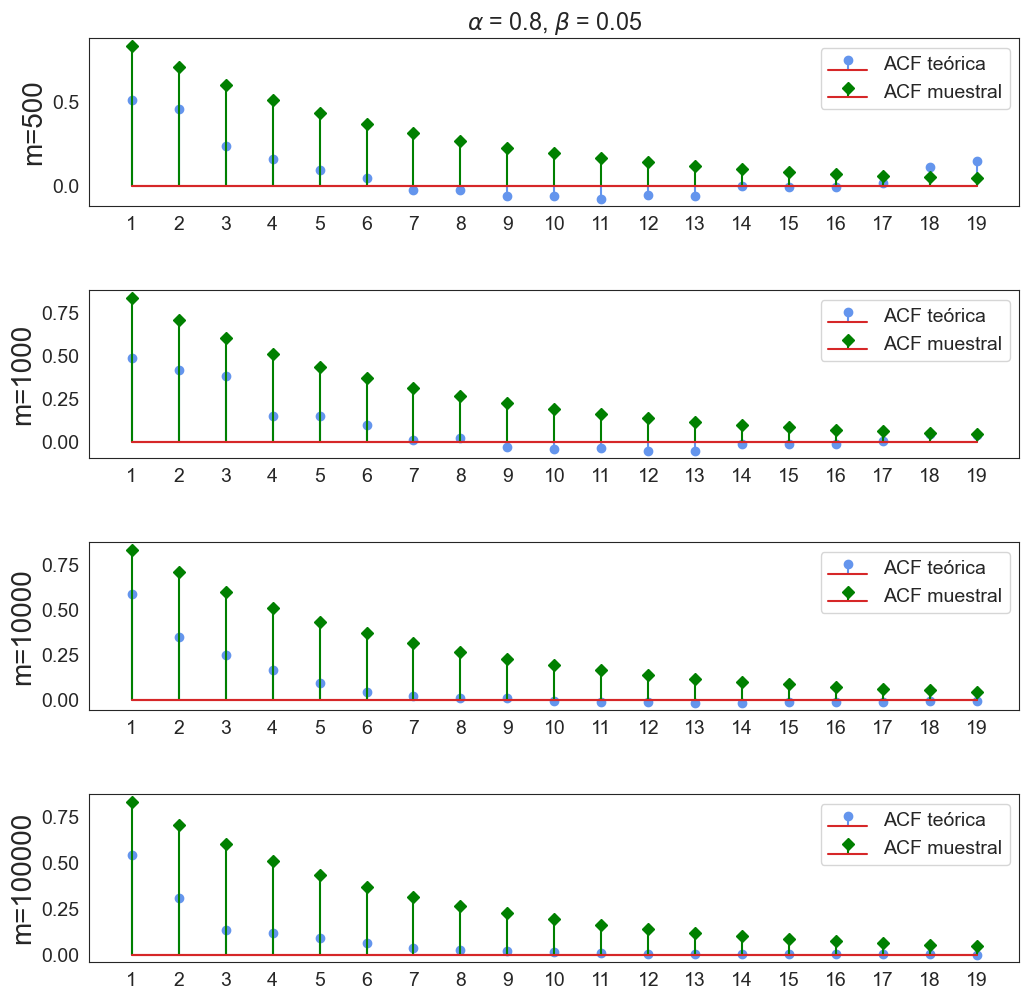

In [38]:
fig, axes = plt.subplots(4,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf_m[i],linefmt = 'cornflowerblue',  label = "ACF teórica")
    ax.stem(acf_t[i],linefmt = 'green',  label='ACF muestral', markerfmt = 'D')
    if i==0:
        ax.set_title(fr'$\alpha$ = {alpha}, $\beta$ = {beta}') 
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    ax.set_ylabel(fr'm={m[i]}', fontsize=20)
    i=i+1

In [39]:
ms=["500","1.000","10.000","100.000"]

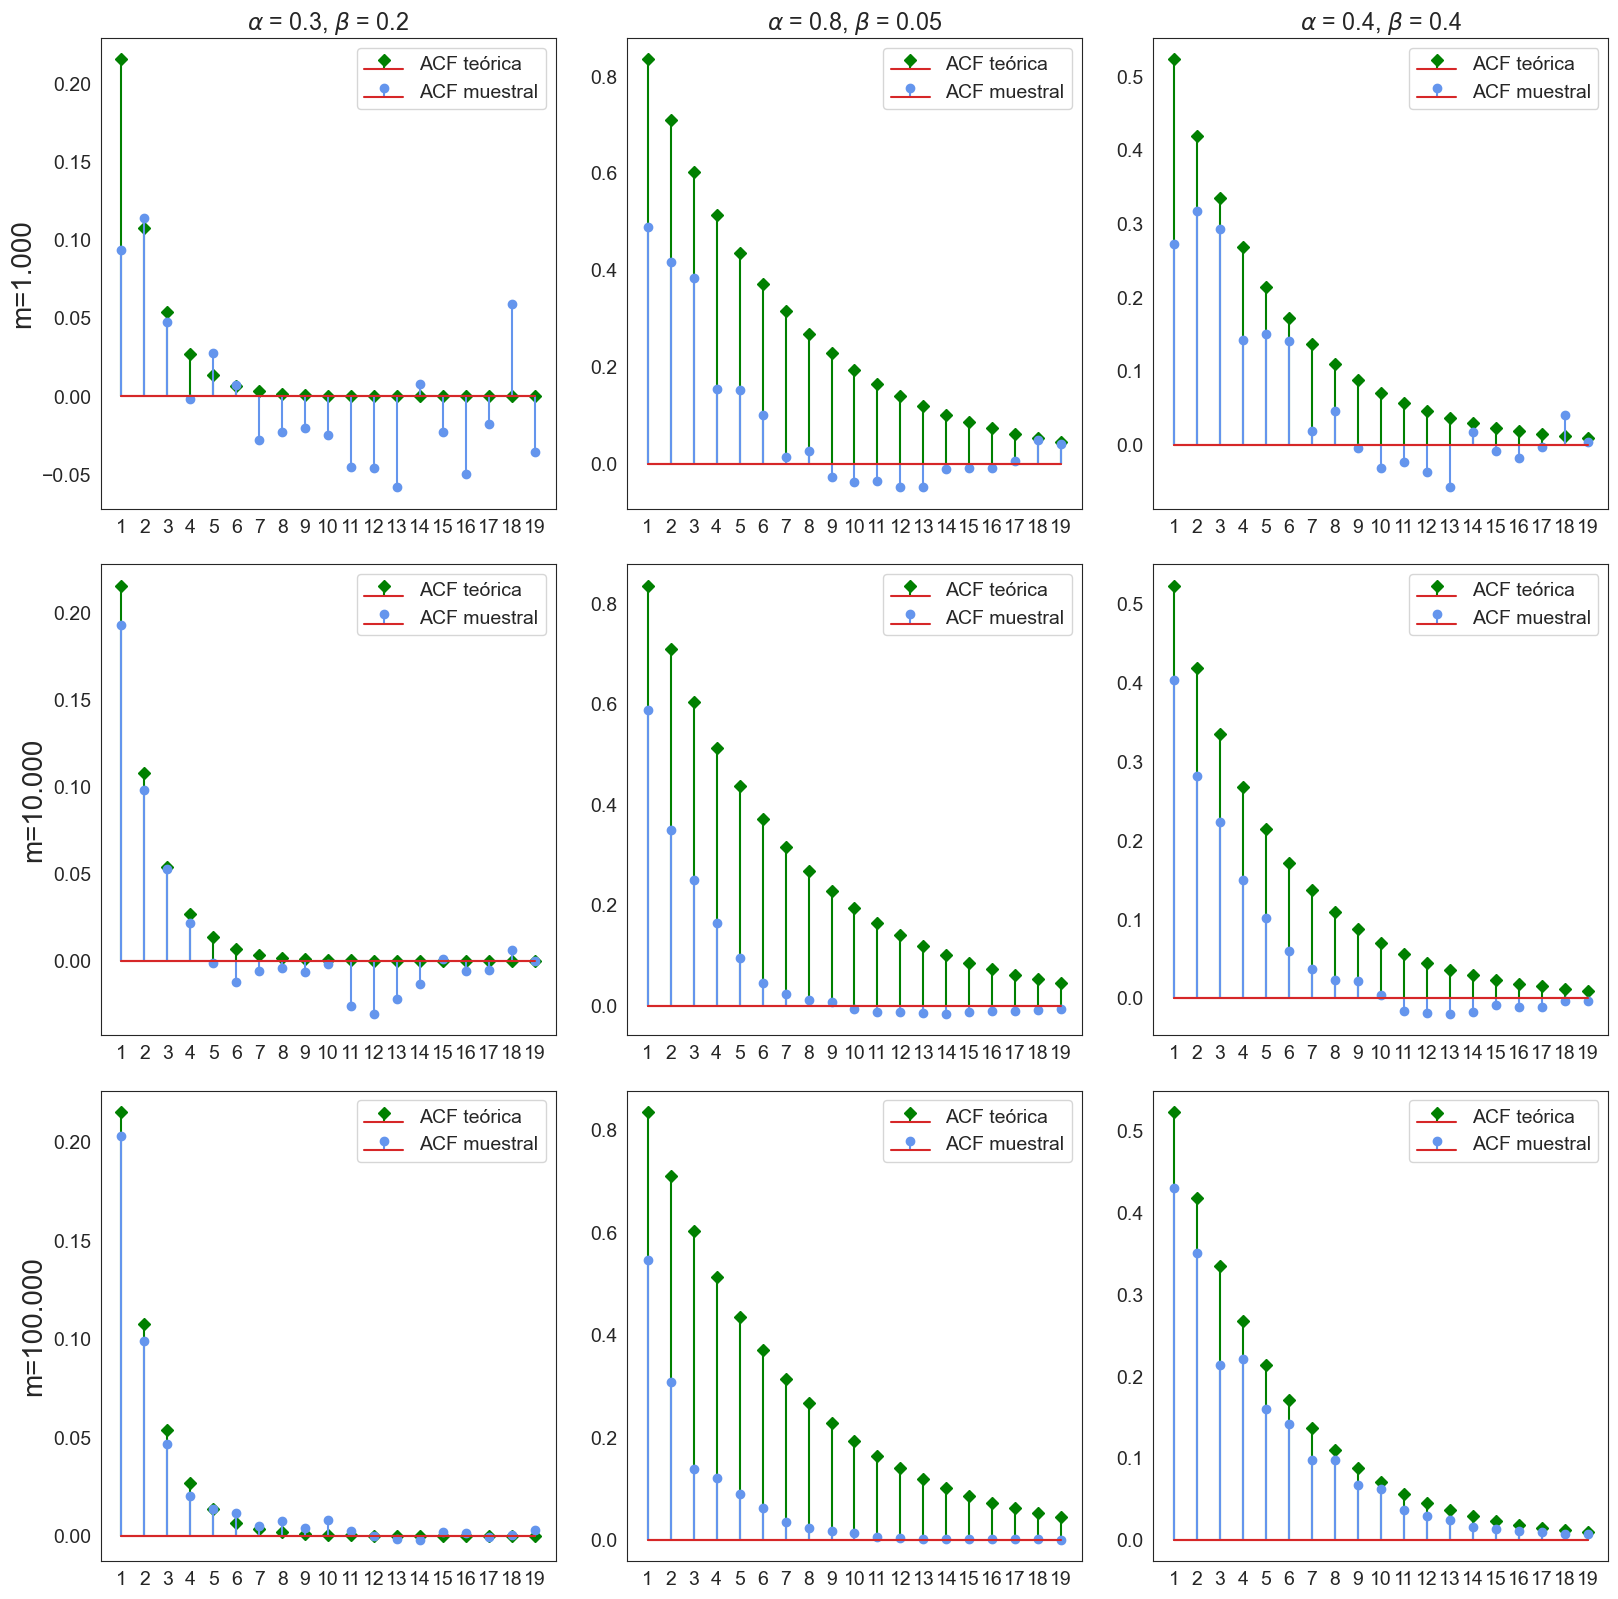

In [40]:
fig, ax = plt.subplots(3,3, figsize=(16, 16))
plt.subplots_adjust(hspace=0.5) 
fig.tight_layout() 
for i in range(3):
    
    ax[i,1].stem(acf_t[i+1],linefmt = 'green',  label="ACF teórica", markerfmt = 'D')
    ax[i,1].stem(acf_m[i+1],linefmt = 'cornflowerblue',  label = "ACF muestral")
    ax[i,0].stem(acf11t[i+1],linefmt = 'green',  label="ACF teórica", markerfmt = 'D')
    ax[i,0].stem(acf11[i+1],linefmt = 'cornflowerblue',  label = "ACF muestral")
    ax[i,2].stem(acf44t[i+1],linefmt = 'green',  label="ACF teórica", markerfmt = 'D')
    ax[i,2].stem(acf44[i+1],linefmt = 'cornflowerblue',  label = "ACF muestral")
    
    if i==0:
        ax[i,1].set_title(fr'$\alpha$ = {0.8}, $\beta$ = {0.05}') 
        ax[i,0].set_title(fr'$\alpha$ = {0.3}, $\beta$ = {0.2}') 
        ax[i,2].set_title(fr'$\alpha$ = {0.4}, $\beta$ = {0.4}') 
    ax[i,0].set_xticks(range(0, 19))
    ax[i,0].set_xticklabels(x)
    ax[i,1].set_xticks(range(0, 19))
    ax[i,1].set_xticklabels(x)
    ax[i,2].set_xticks(range(0, 19))
    ax[i,2].set_xticklabels(x)
    ax[i,0].legend()
    ax[i,1].legend()
    ax[i,2].legend()
    ax[i,0].set_ylabel(fr'm='+ms[i+1], fontsize=20)

### Como podemos ver en la ultima serie la ACF no concuerda con lo teoríco, veamos si simulamos varias trayectorias y la promediamos podemos aproximarla, en general con m=1000 datos la acf muestral se parece a la teoríca, así que dejaremos m=1000 fijo para variar la cantidad de trayectorias

In [41]:
x = np.arange(1,20)
alpha = [0.2,0.05,0.8,0.4]
beta = [0.3,0.8,0.05,0.4]
omega = 0.1

In [42]:
acf1 =[]
acf2 = []
acf3 = []
acf4 = []

acf1t =[]
acf2t = []
acf3t = []
acf4t = []

## n = 10 y m = 1000 

In [43]:
acf_total = []
acf_t_total = []

In [44]:
acf_m = []
acf_t = []
n=10
m=1000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

In [45]:
distancias_acf1 = []
for i in range(len(alpha)):
    distancias_acf1.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [46]:
acf1.append(acf_m[0])
acf2.append(acf_m[1])
acf3.append(acf_m[2])
acf4.append(acf_m[3])

acf1t.append(acf_t[0])
acf2t.append(acf_t[1])
acf3t.append(acf_t[2])
acf4t.append(acf_t[3])

# n = 100 y m=1000

In [47]:
acf_m = []
acf_t = []
n=100
m=1000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)


In [48]:
distancias_acf2 = []
for i in range(len(alpha)):
    distancias_acf2.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [49]:
acf1.append(acf_m[0])
acf2.append(acf_m[1])
acf3.append(acf_m[2])
acf4.append(acf_m[3])

acf1t.append(acf_t[0])
acf2t.append(acf_t[1])
acf3t.append(acf_t[2])
acf4t.append(acf_t[3])

## n = 1000 y m=1000

In [50]:
acf_m = []
acf_t = []
n=1000
m=1000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

In [51]:
distancias_acf3 = []
for i in range(len(alpha)):
    distancias_acf3.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [52]:
names = ["acf1","acf2","acf3","acf4"]
dist = [distancias_acf1,distancias_acf2,distancias_acf3]
resumen = pd.DataFrame(dist,columns = names)
resumen.index = ["n=10","n=100","n=1000"]

In [53]:
acf1.append(acf_m[0])
acf2.append(acf_m[1])
acf3.append(acf_m[2])
acf4.append(acf_m[3])

acf1t.append(acf_t[0])
acf2t.append(acf_t[1])
acf3t.append(acf_t[2])
acf4t.append(acf_t[3])

In [54]:
nn = [10,100,1000]

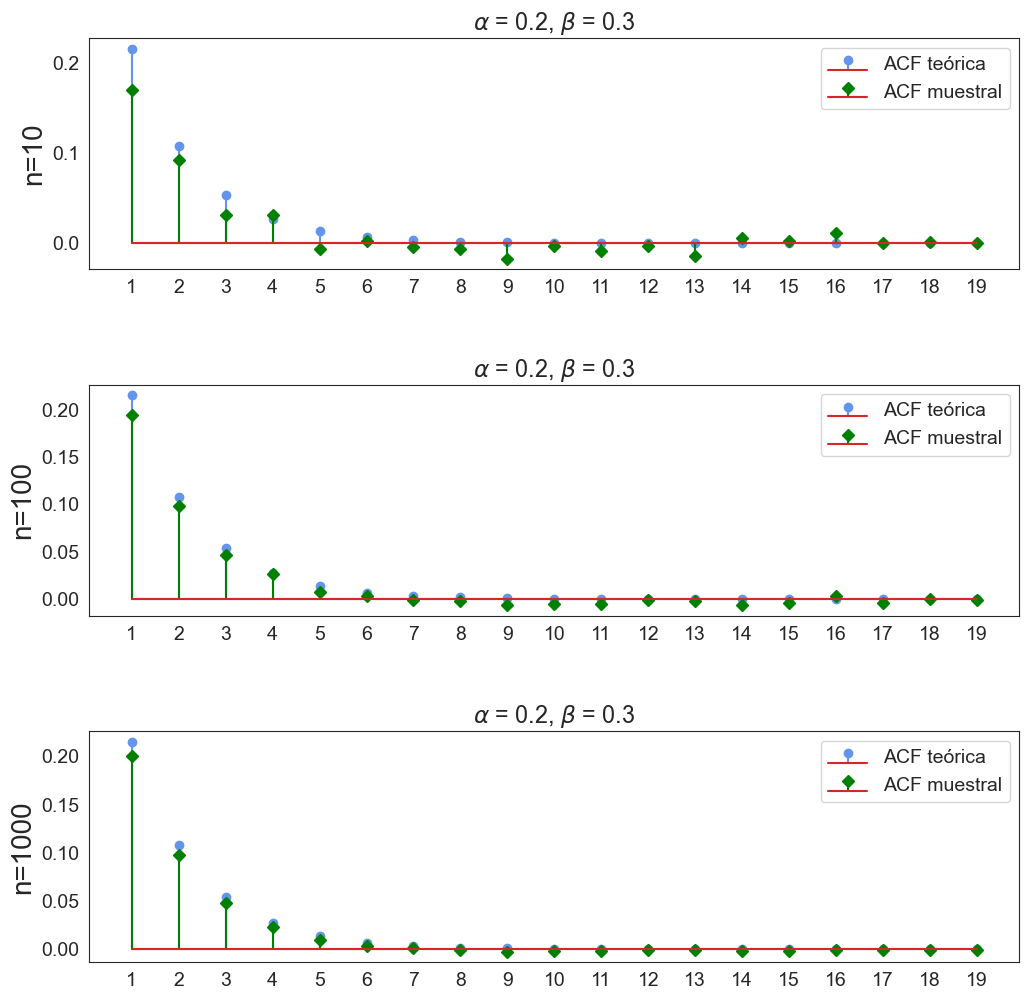

In [55]:
fig, axes = plt.subplots(3,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf1t[i],linefmt = 'cornflowerblue',  label = "ACF teórica")
    ax.stem(acf1[i],linefmt = 'green',  label='ACF muestral', markerfmt = 'D')
    ax.set_title(fr'$\alpha$ = {alpha[0]}, $\beta$ = {beta[0]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.legend()
    ax.set_ylabel(fr'n={nn[i]}', fontsize=20)
    i=i+1

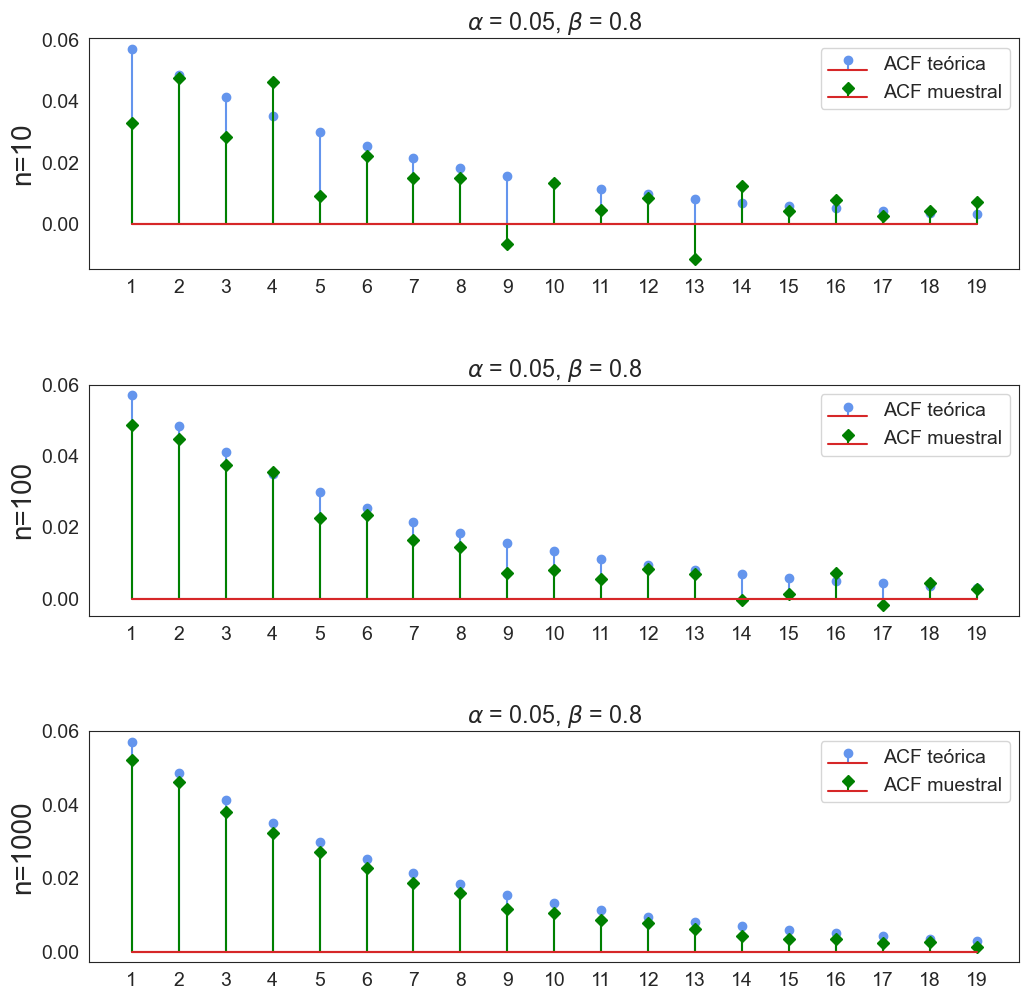

In [56]:
fig, axes = plt.subplots(3,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf2t[i],linefmt = 'cornflowerblue',  label = "ACF teórica")
    ax.stem(acf2[i],linefmt = 'green',  label='ACF muestral', markerfmt = 'D')
    ax.set_title(fr'$\alpha$ = {alpha[1]}, $\beta$ = {beta[1]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.set_ylabel(fr'n={nn[i]}', fontsize=20)
    ax.legend()
    i=i+1

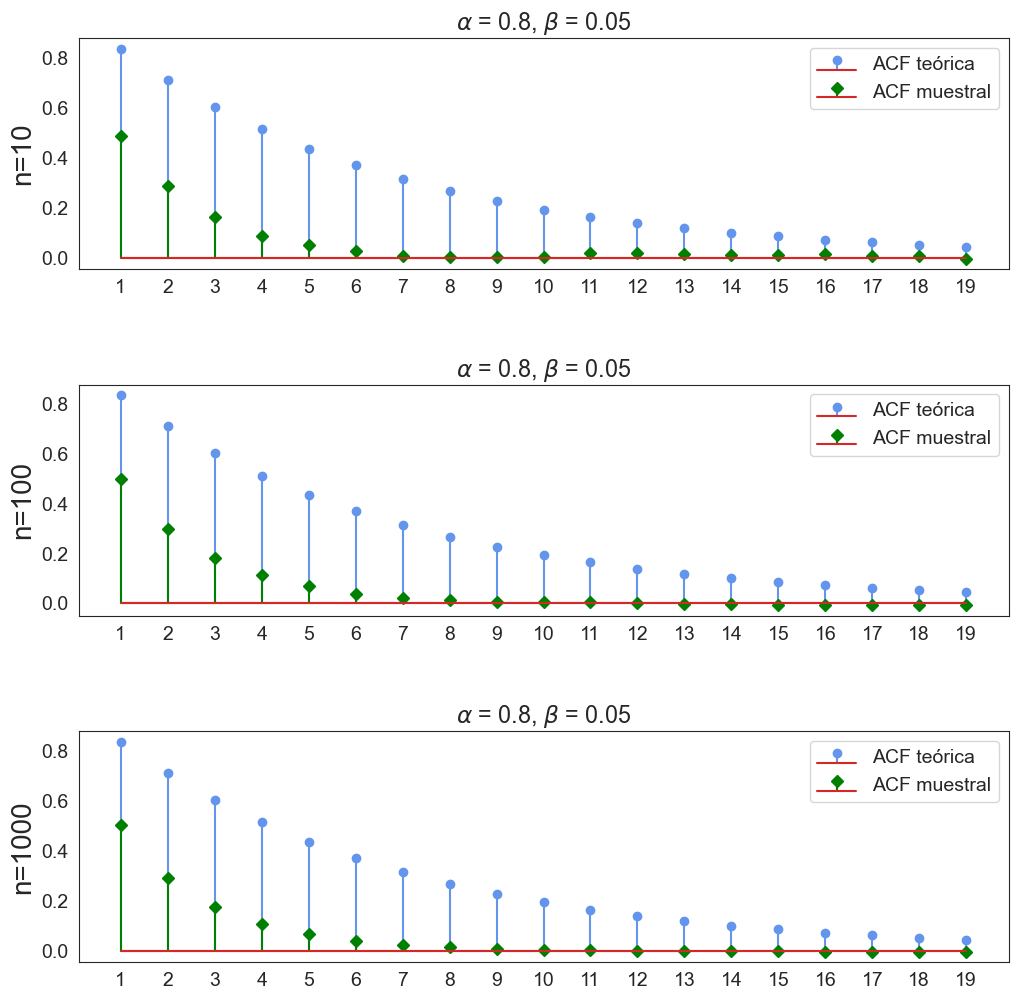

In [57]:
fig, axes = plt.subplots(3,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf3t[i],linefmt = 'cornflowerblue',  label = "ACF teórica")
    ax.stem(acf3[i],linefmt = 'green',  label='ACF muestral', markerfmt = 'D')
    ax.set_title(fr'$\alpha$ = {alpha[2]}, $\beta$ = {beta[2]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.set_ylabel(fr'n={nn[i]}', fontsize=20)
    ax.legend()
    i=i+1

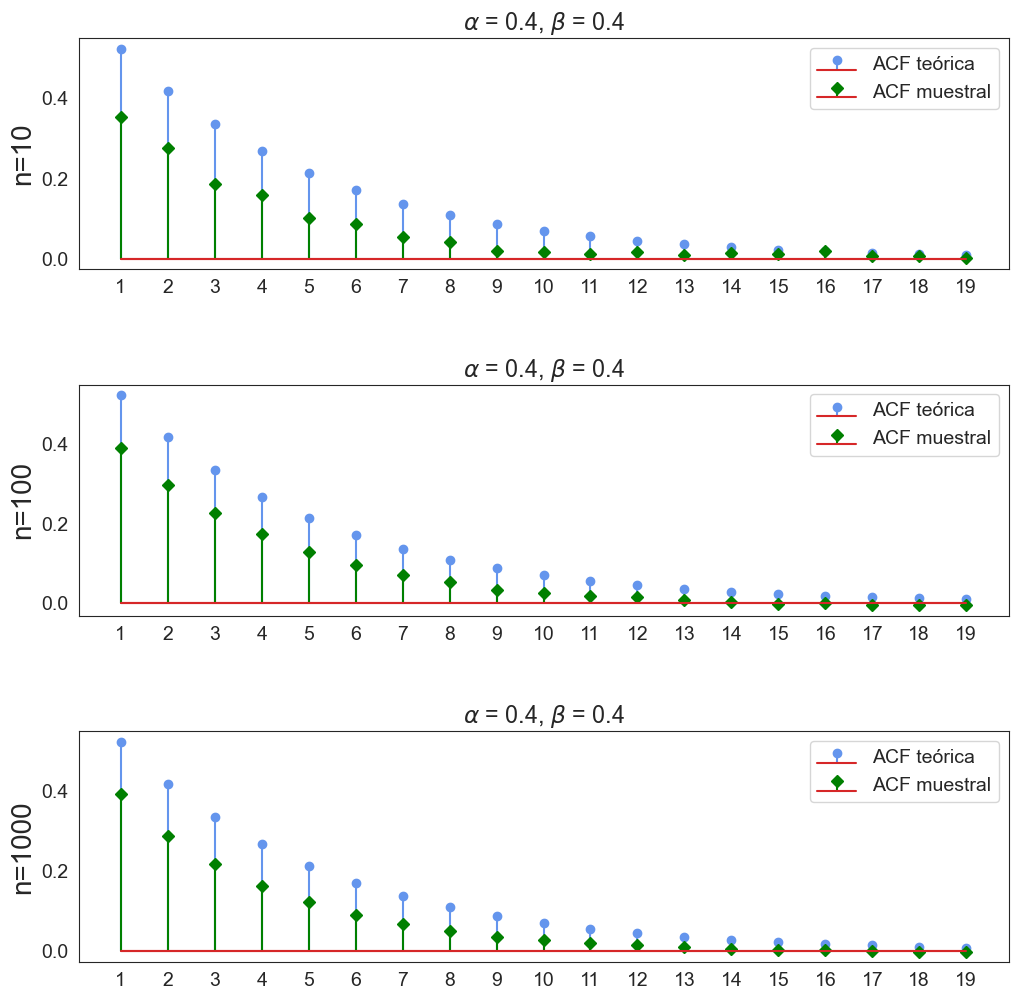

In [58]:
fig, axes = plt.subplots(3,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf4t[i],linefmt = 'cornflowerblue',  label = "ACF teórica")
    ax.stem(acf4[i],linefmt = 'green',  label='ACF muestral', markerfmt = 'D')
    ax.set_title(fr'$\alpha$ = {alpha[3]}, $\beta$ = {beta[3]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.set_ylabel(fr'n={nn[i]}', fontsize=20)
    ax.legend()
    i=i+1

 Para los 2 ultimos casos $\alpha = 0.8 $,$\beta = 0.05$ y $\alpha = \beta = 0.4$, se siguen sin parecer, probemos que pasi de tenemos una cantidad fija de series, 100 en este caso y si aumentamo la cantidad de datos, escojemos 100 pues no cambia mucho en relación a 1000, en "resumen" nos muestra la distancia entre los valores de la acf muestral y teorica en norma, es decir vemos los valores de cada acf como si fuese un vector y le calculamos la distancia euclidiana

In [59]:
resumen

,acf1,acf2,acf3,acf4
n=10,0.064596,0.048565,1.121829,0.355426
n=100,0.029511,0.021051,1.092395,0.287289
n=1000,0.021087,0.011421,1.095951,0.300373


In [60]:
n = ["10","100","1.000"]

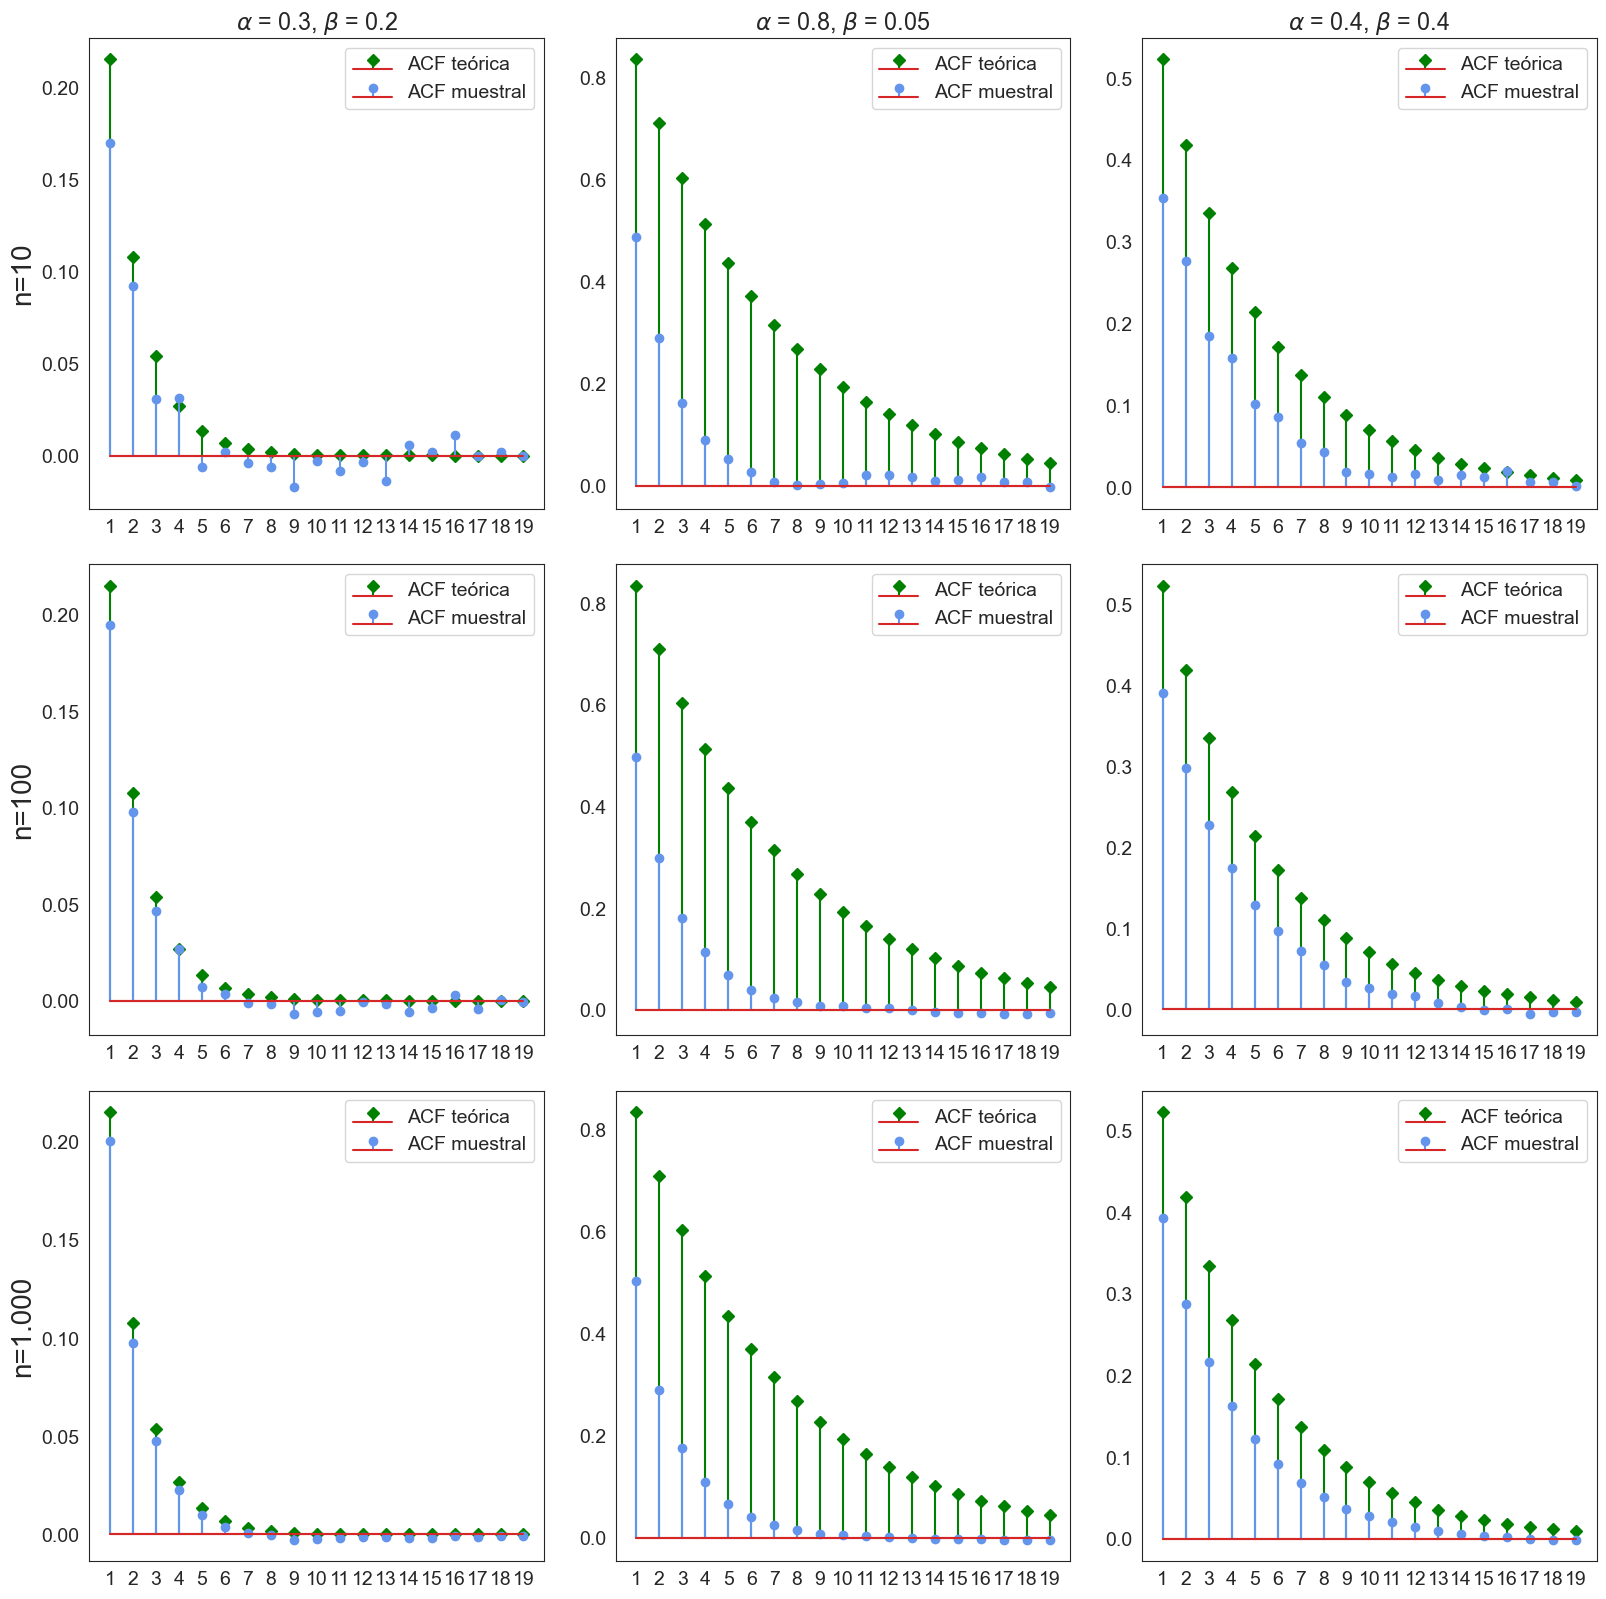

In [62]:
fig, ax = plt.subplots(3,3, figsize=(16, 16))
plt.subplots_adjust(hspace=0.5) 
fig.tight_layout() 
for i in range(3):
    
    ax[i,1].stem(acf3t[i],linefmt = 'green',  label="ACF teórica", markerfmt = 'D')
    ax[i,1].stem(acf3[i],linefmt = 'cornflowerblue',  label = "ACF muestral")
    ax[i,0].stem(acf1t[i],linefmt = 'green',  label="ACF teórica", markerfmt = 'D')
    ax[i,0].stem(acf1[i],linefmt = 'cornflowerblue',  label = "ACF muestral")
    ax[i,2].stem(acf4t[i],linefmt = 'green',  label="ACF teórica", markerfmt = 'D')
    ax[i,2].stem(acf4[i],linefmt = 'cornflowerblue',  label = "ACF muestral")
    
    if i==0:
        ax[i,1].set_title(fr'$\alpha$ = {0.8}, $\beta$ = {0.05}') 
        ax[i,0].set_title(fr'$\alpha$ = {0.3}, $\beta$ = {0.2}') 
        ax[i,2].set_title(fr'$\alpha$ = {0.4}, $\beta$ = {0.4}') 
    ax[i,0].set_xticks(range(0, 19))
    ax[i,0].set_xticklabels(x)
    ax[i,1].set_xticks(range(0, 19))
    ax[i,1].set_xticklabels(x)
    ax[i,2].set_xticks(range(0, 19))
    ax[i,2].set_xticklabels(x)
    ax[i,0].legend()
    ax[i,1].legend()
    ax[i,2].legend()
    ax[i,0].set_ylabel(fr'n='+n[i], fontsize=20)

Puesto que tenemos dudas sobre las series con las ultimas tuplas de parametros, realizaremos este parte solo con ellas

# N fijo en 100 y m variando

In [63]:
acf1 =[]
acf2 = []
acf3 = []
acf4 = []

acf1t =[]
acf2t = []
acf3t = []
acf4t = []

In [64]:
alpha = [0.3,0.8,0.4]
beta = [0.2,0.05,0.4]
acf_m = []
acf_t = []
n=100
m=10000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

In [65]:
distancias_acf1 = []
for i in range(len(alpha)):
    distancias_acf1.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [66]:
acf1.append(acf_m[0])
acf3.append(acf_m[1])
acf4.append(acf_m[2])

acf1t.append(acf_m[0])
acf3t.append(acf_t[1])
acf4t.append(acf_t[2])

In [67]:
acf_m = []
acf_t = []
n=100
m=100000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)
distancias_acf2 = []
for i in range(len(alpha)):
    distancias_acf2.append(np.linalg.norm(acf_m[i]-acf_t[i]))

acf1.append(acf_m[0])
acf3.append(acf_m[1])
acf4.append(acf_m[2])

acf1t.append(acf_m[0])
acf3t.append(acf_t[1])
acf4t.append(acf_t[2])
#------------------
acf_m = []
acf_t = []
n=100
m=1000000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)
distancias_acf3 = []
for i in range(len(alpha)):
    distancias_acf3.append(np.linalg.norm(acf_m[i]-acf_t[i]))

acf1.append(acf_m[0])
acf3.append(acf_m[1])
acf4.append(acf_m[2])

acf1t.append(acf_m[0])
acf3t.append(acf_t[1])
acf4t.append(acf_t[2])

In [69]:
m = [10_000,100_000,1_000_000]

In [70]:
ms = ["10.000","100.000","1.000.000"]

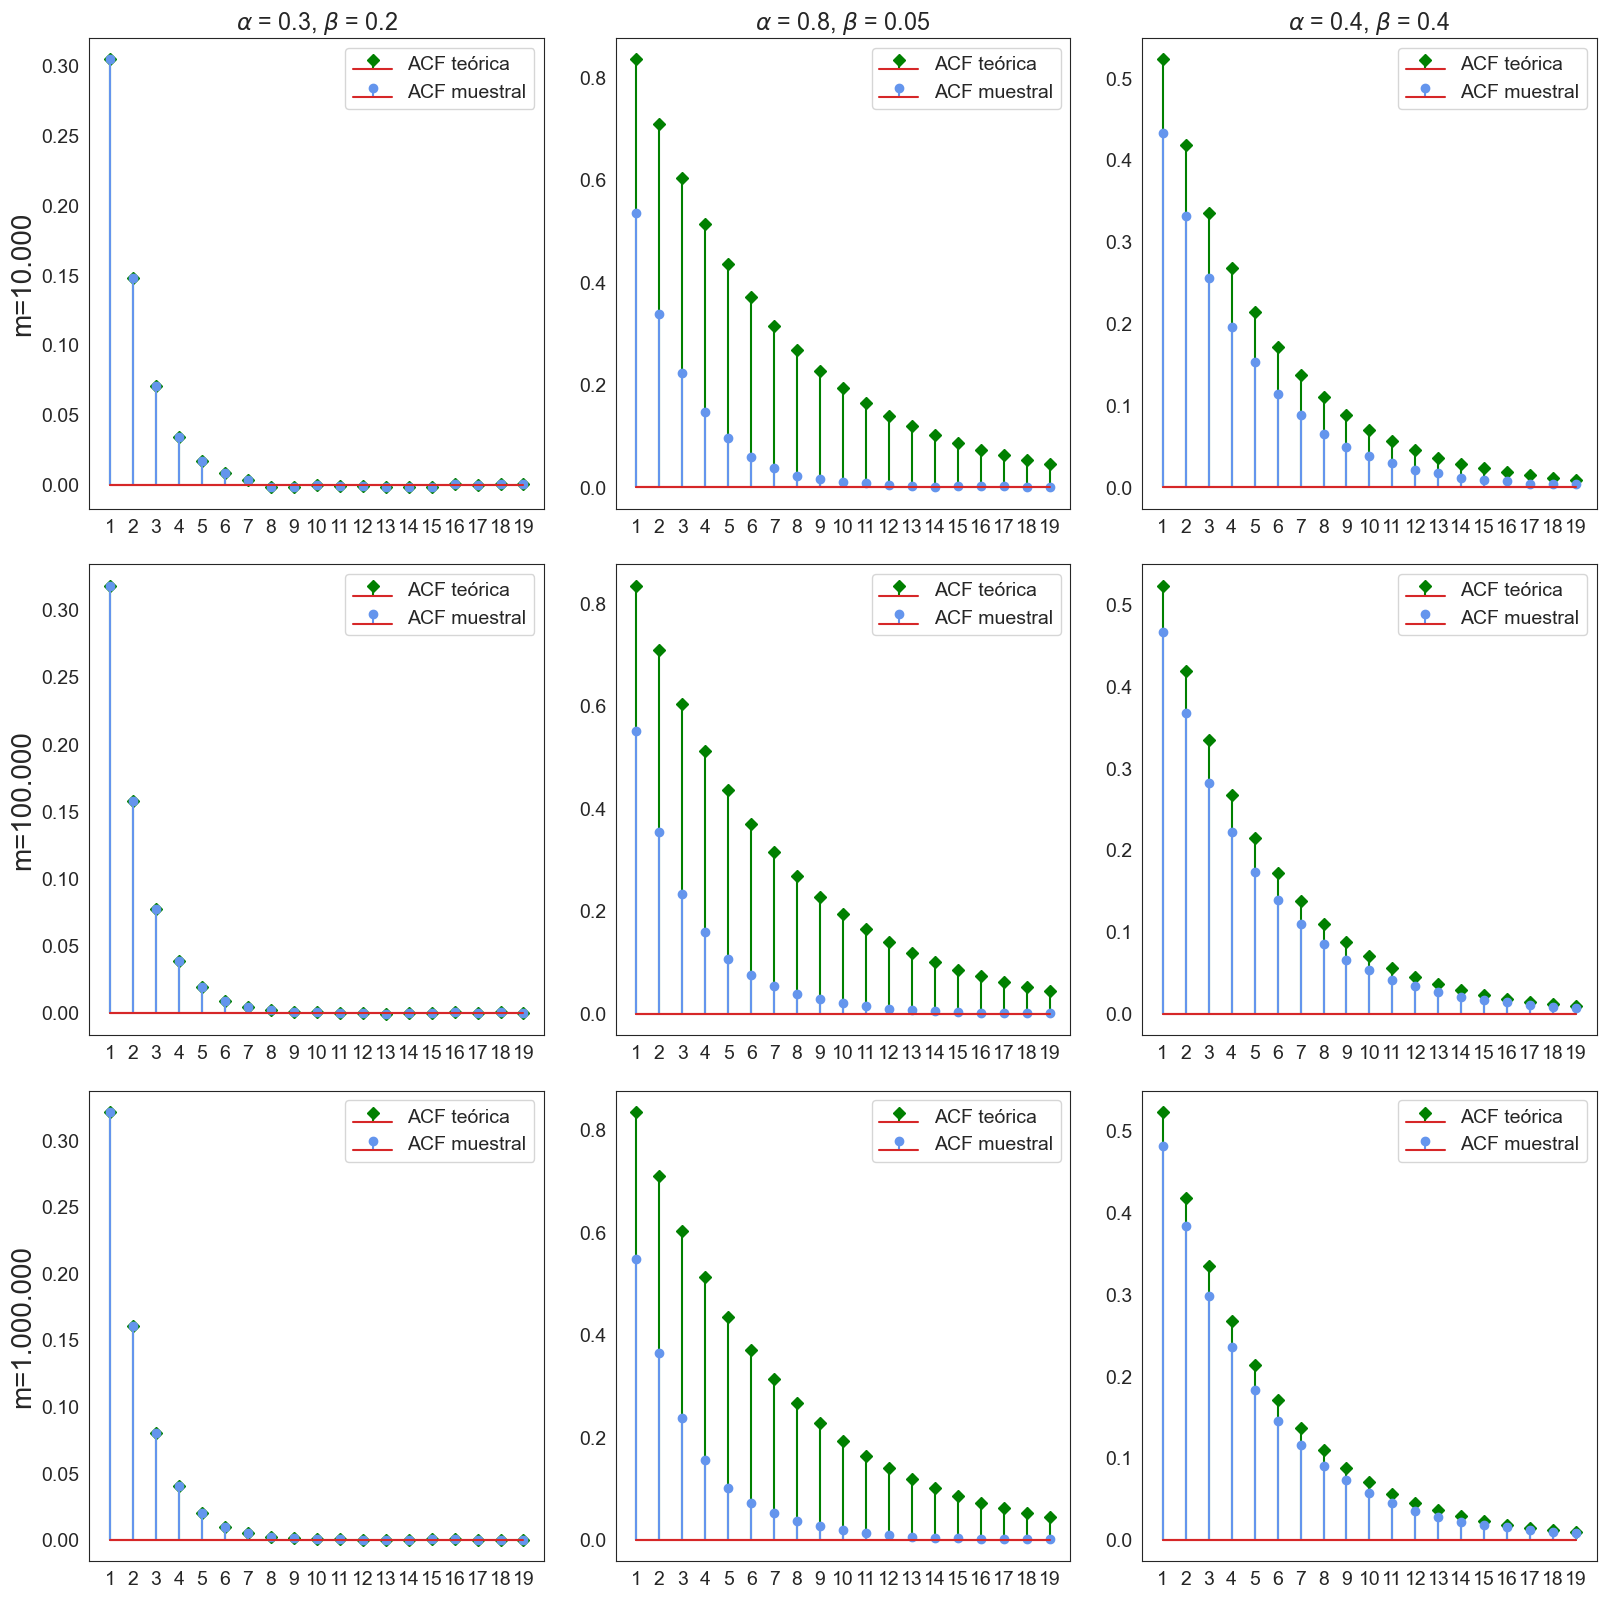

In [72]:
fig, ax = plt.subplots(3,3, figsize=(16, 16))
plt.subplots_adjust(hspace=0.5) 
fig.tight_layout() 
for i in range(3):
    
    ax[i,1].stem(acf3t[i],linefmt = 'green',  label="ACF teórica", markerfmt = 'D')
    ax[i,1].stem(acf3[i],linefmt = 'cornflowerblue',  label = "ACF muestral")
    ax[i,0].stem(acf1t[i],linefmt = 'green',  label="ACF teórica", markerfmt = 'D')
    ax[i,0].stem(acf1[i],linefmt = 'cornflowerblue',  label = "ACF muestral")
    ax[i,2].stem(acf4t[i],linefmt = 'green',  label="ACF teórica", markerfmt = 'D')
    ax[i,2].stem(acf4[i],linefmt = 'cornflowerblue',  label = "ACF muestral")
    
    if i==0:
        ax[i,1].set_title(fr'$\alpha$ = {0.8}, $\beta$ = {0.05}') 
        ax[i,0].set_title(fr'$\alpha$ = {0.3}, $\beta$ = {0.2}') 
        ax[i,2].set_title(fr'$\alpha$ = {0.4}, $\beta$ = {0.4}') 
    ax[i,0].set_xticks(range(0, 19))
    ax[i,0].set_xticklabels(x)
    ax[i,1].set_xticks(range(0, 19))
    ax[i,1].set_xticklabels(x)
    ax[i,2].set_xticks(range(0, 19))
    ax[i,2].set_xticklabels(x)
    ax[i,0].legend()
    ax[i,1].legend()
    ax[i,2].legend()
    ax[i,0].set_ylabel(fr'm='+ms[i], fontsize=20)

# No ocupado

In [421]:
names = ["acf3","acf4"]
dist = [distancias_acf1,distancias_acf2,distancias_acf3]
resumen2 = pd.DataFrame(dist,columns = names)
resumen2.index = ["m=1000","n=10000","n=100000"]

In [452]:
print(resumen2.to_latex())

\begin{tabular}{lrr}
\toprule
 & acf3 & acf4 \\
\midrule
m=1000 & 1.092395 & 0.287289 \\
n=10000 & 1.010496 & 0.207830 \\
n=100000 & 0.967443 & 0.127504 \\
\bottomrule
\end{tabular}



In [422]:
nn = [1000,10000,100000]

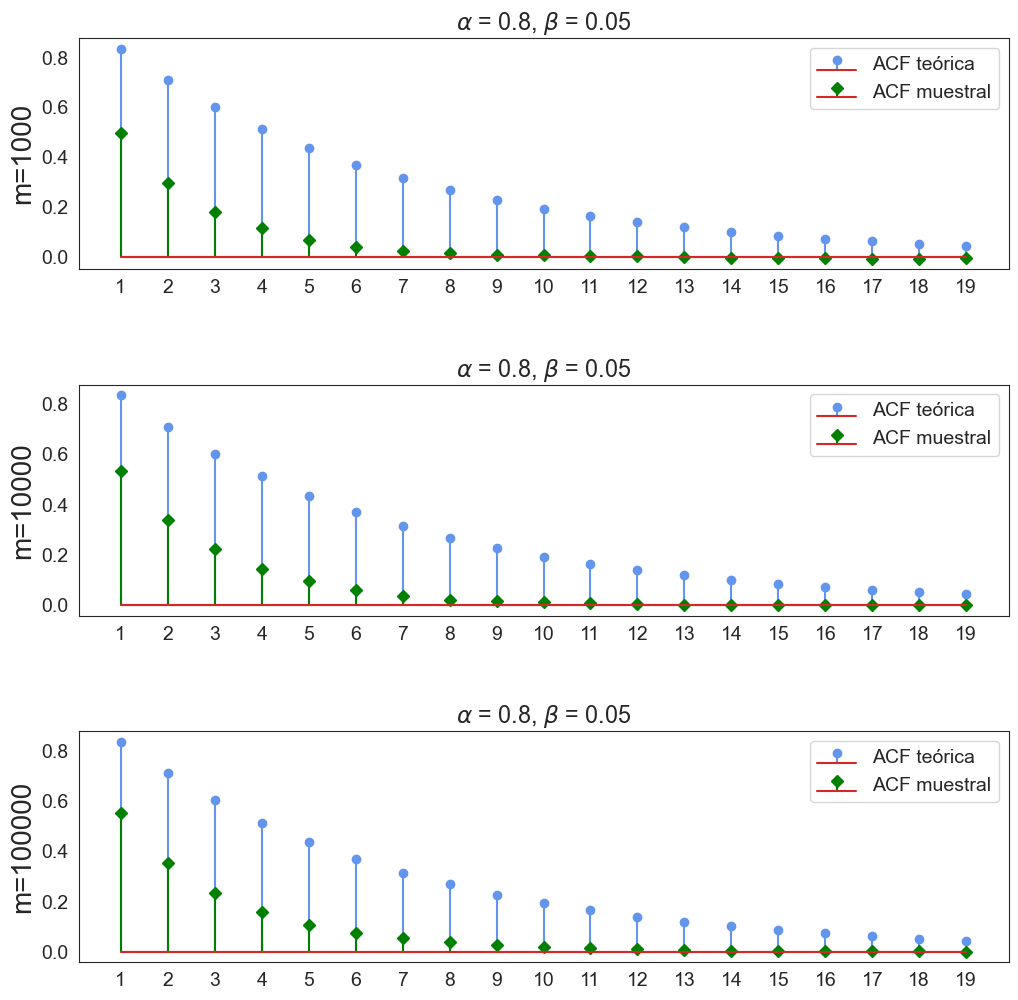

In [423]:
fig, axes = plt.subplots(3,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf3t[i],linefmt = 'cornflowerblue',  label = "ACF teórica")
    ax.stem(acf3[i],linefmt = 'green',  label='ACF muestral', markerfmt = 'D')
    ax.set_title(fr'$\alpha$ = {alpha[0]}, $\beta$ = {beta[0]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.set_ylabel(fr'm={nn[i]}', fontsize=20)
    ax.legend()
    i=i+1

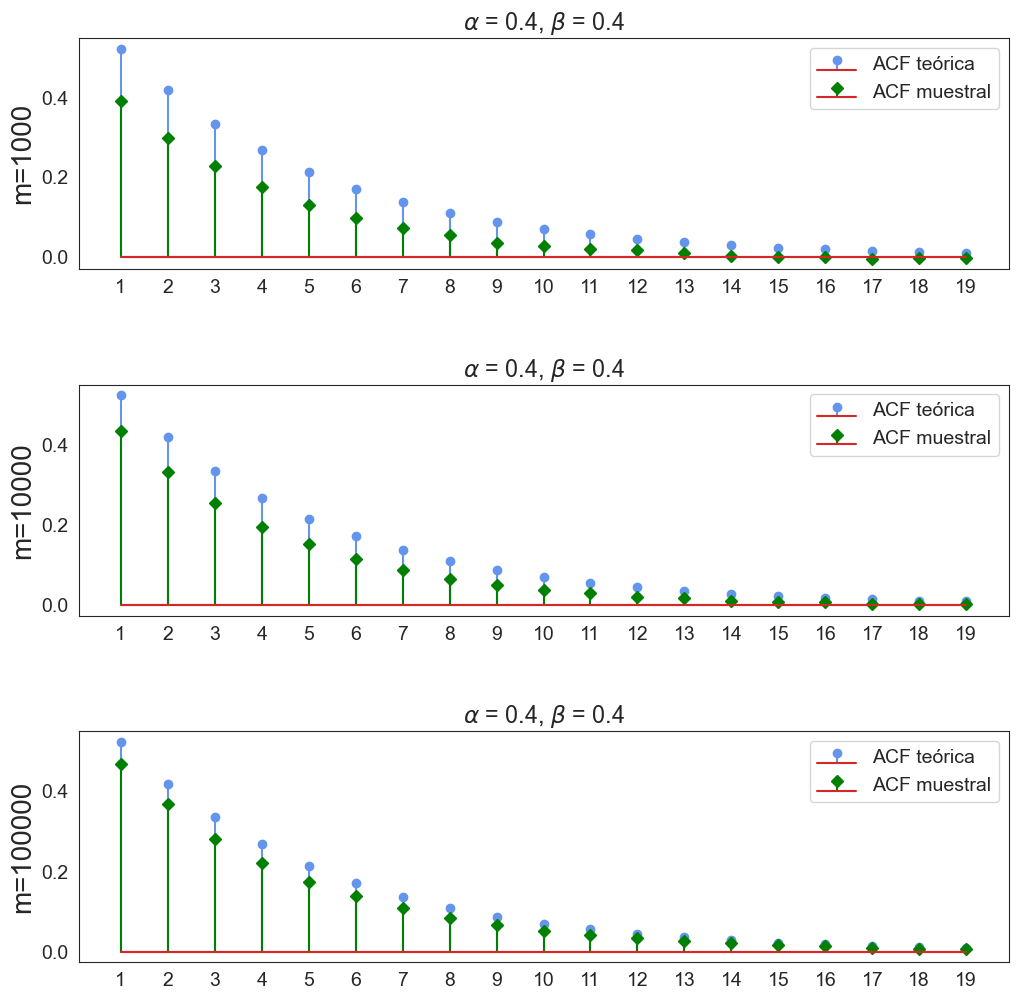

In [424]:
fig, axes = plt.subplots(3,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf4t[i],linefmt = 'cornflowerblue',  label = "ACF teórica")
    ax.stem(acf4[i],linefmt = 'green',  label='ACF muestral', markerfmt = 'D')
    ax.set_title(fr'$\alpha$ = {alpha[1]}, $\beta$ = {beta[1]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.set_ylabel(fr'm={nn[i]}', fontsize=20)
    ax.legend()
    i=i+1

In [445]:
resumen2

,acf3,acf4
m=1000,1.092395,0.287289
n=10000,1.010496,0.207830
n=100000,0.967443,0.127504


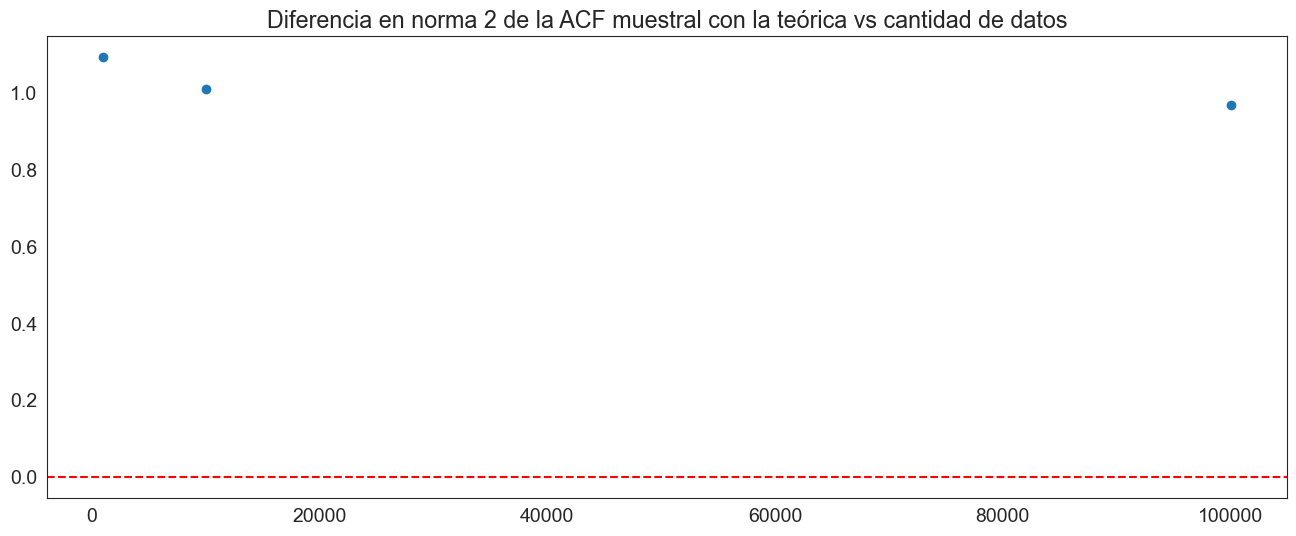

In [451]:
plt.scatter(nn,resumen2["acf3"])
plt.axhline(y=0, color='red', linestyle='--', label='Línea en y=0')
plt.title("Diferencia en norma 2 de la ACF muestral con la teórica vs cantidad de datos" );

# ----------------------------------------

In [333]:
alpha = 0.8
beta = 0.05
acf_m = []
acf_t = []
n=100
m=100_000_000

acfm,acft = sim_garch(n,m,alpha,beta,omega)
acf_m.append(acfm)
acf_t.append(acft)

KeyboardInterrupt: 

In [ ]:
distancias_acf0 = []
for i in range(len(alpha)):
    distancias_acf0.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 12))

plt.subplots_adjust(hspace=0.5) 

ax.stem(acf_t,linefmt = 'cornflowerblue',  label = "ACF teórica")
ax.stem(acf_m[i],linefmt = 'green',  label='ACF muestral', markerfmt = 'D')
ax.set_title(fr'$\alpha$ = {alpha}, $\beta$ = {beta}')  
ax.set_xticks(range(0, 19))
ax.set_xticklabels(x)
ax.set_ylabel(fr'm={nn[i]}', fontsize=20)
ax.legend()


# ---------------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------------

# m = 1000 y variando el n

In [203]:
acf1 =[]
acf2 = []
acf3 = []
acf4 = []

acf1t =[]
acf2t = []
acf3t = []
acf4t = []

In [204]:
acf_m = []
acf_t = []
n=100
m=1000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

In [205]:
distancias_acf1 = []
for i in range(len(alpha)):
    distancias_acf1.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [206]:
acf1.append(acf_m[0])
acf2.append(acf_m[1])
acf3.append(acf_m[2])
acf4.append(acf_m[3])

acf1t.append(acf_t[0])
acf2t.append(acf_t[1])
acf3t.append(acf_t[2])
acf4t.append(acf_t[3])

In [207]:
acf_m = []
acf_t = []
n=1000
m=1000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

In [208]:
distancias_acf2 = []
for i in range(len(alpha)):
    distancias_acf2.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [209]:
acf1.append(acf_m[0])
acf2.append(acf_m[1])
acf3.append(acf_m[2])
acf4.append(acf_m[3])

acf1t.append(acf_t[0])
acf2t.append(acf_t[1])
acf3t.append(acf_t[2])
acf4t.append(acf_t[3])

In [210]:
acf_m = []
acf_t = []
n=10000
m=1000
for i in range(len(alpha)):
    acfm,acft = sim_garch(n,m,alpha[i],beta[i],omega)
    acf_m.append(acfm)
    acf_t.append(acft)

In [211]:
distancias_acf2 = []
for i in range(len(alpha)):
    distancias_acf2.append(np.linalg.norm(acf_m[i]-acf_t[i]))

In [212]:
acf1.append(acf_m[0])
acf2.append(acf_m[1])
acf3.append(acf_m[2])
acf4.append(acf_m[3])

acf1t.append(acf_t[0])
acf2t.append(acf_t[1])
acf3t.append(acf_t[2])
acf4t.append(acf_t[3])

In [213]:
names = ["acf1","acf2","acf3","acf4"]
dist = [distancias_acf1,distancias_acf2,distancias_acf3]
resumen2 = pd.DataFrame(dist,columns = names)
resumen2.index = ["n=100","n=1000","n=10000"]

# graps

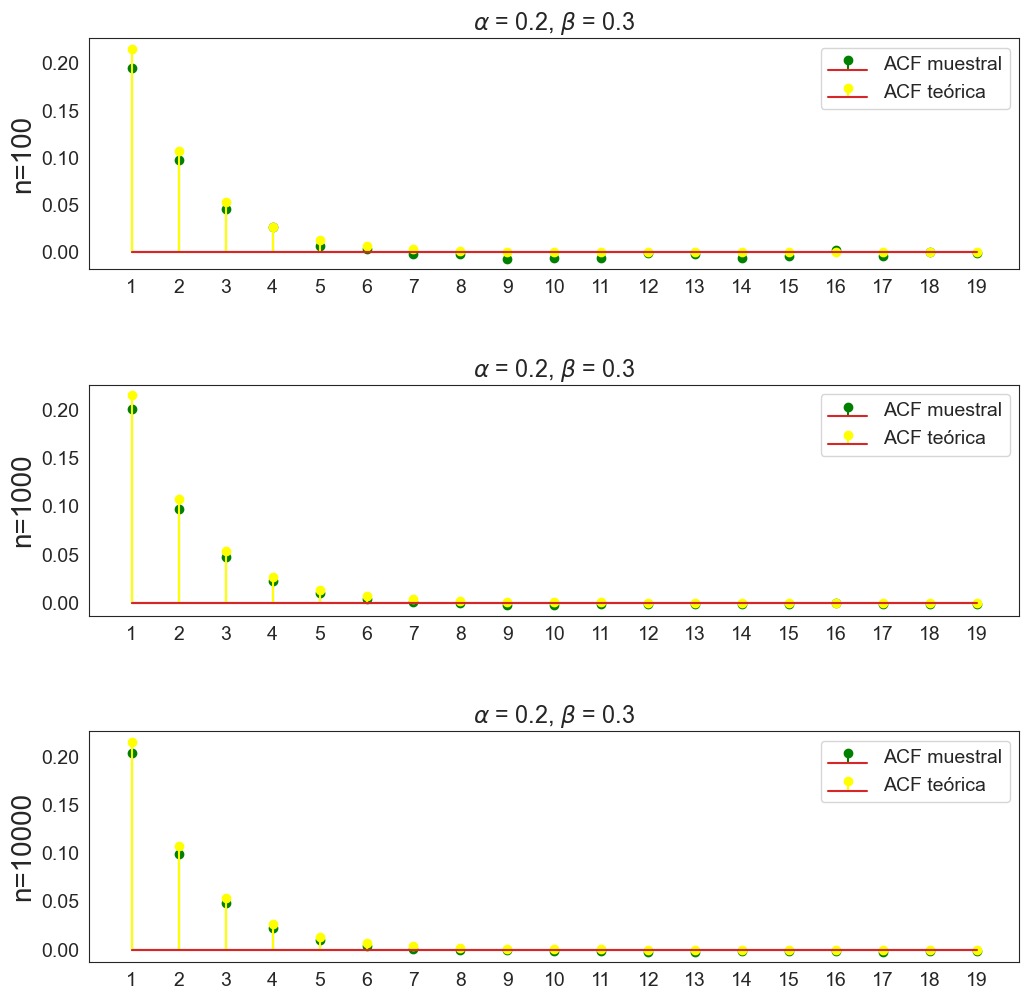

In [214]:
fig, axes = plt.subplots(3,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf1[i],linefmt='green', label='ACF muestral')
    ax.stem(acf1t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[0]}, $\beta$ = {beta[0]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.set_ylabel(fr'n={nn[i]}', fontsize=20)
    ax.legend()
    i=i+1

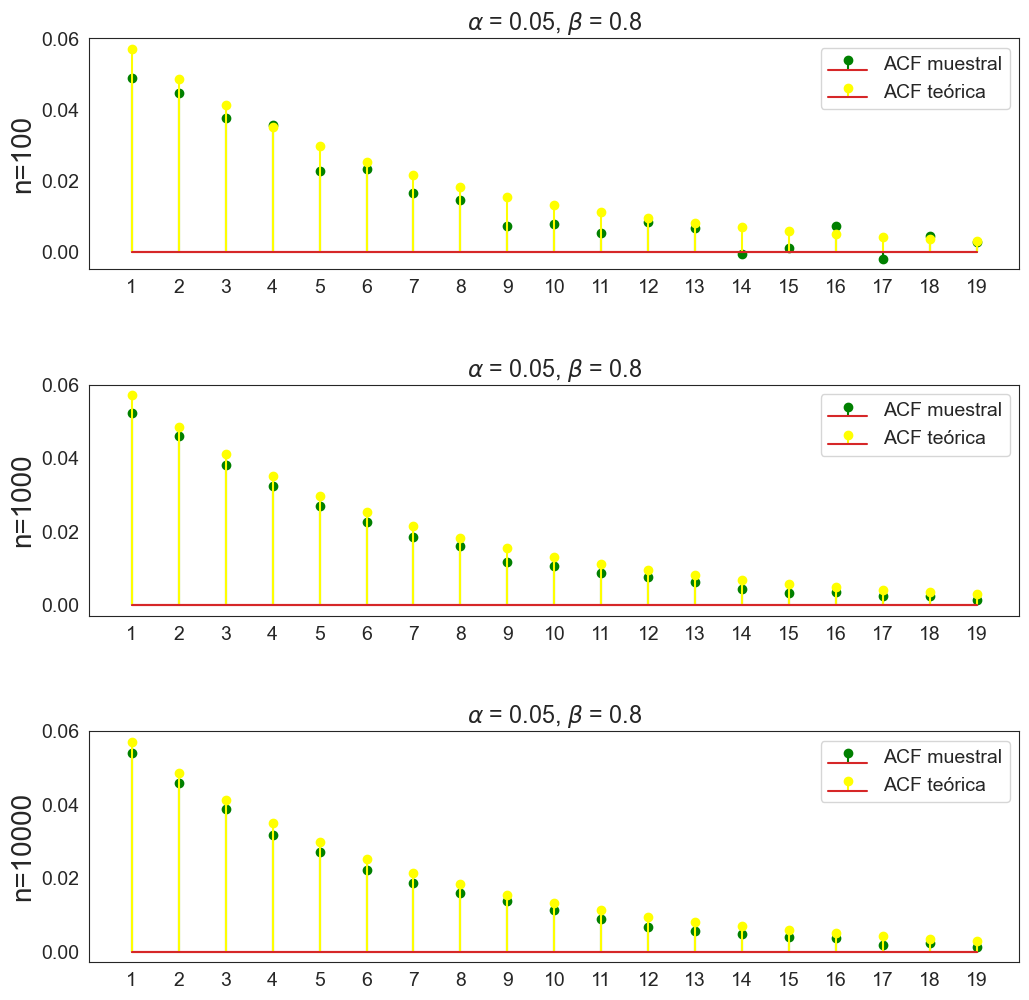

In [215]:
fig, axes = plt.subplots(3,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf2[i],linefmt='green', label='ACF muestral')
    ax.stem(acf2t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[1]}, $\beta$ = {beta[1]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.set_ylabel(fr'n={nn[i]}', fontsize=20)
    ax.legend()
    i=i+1

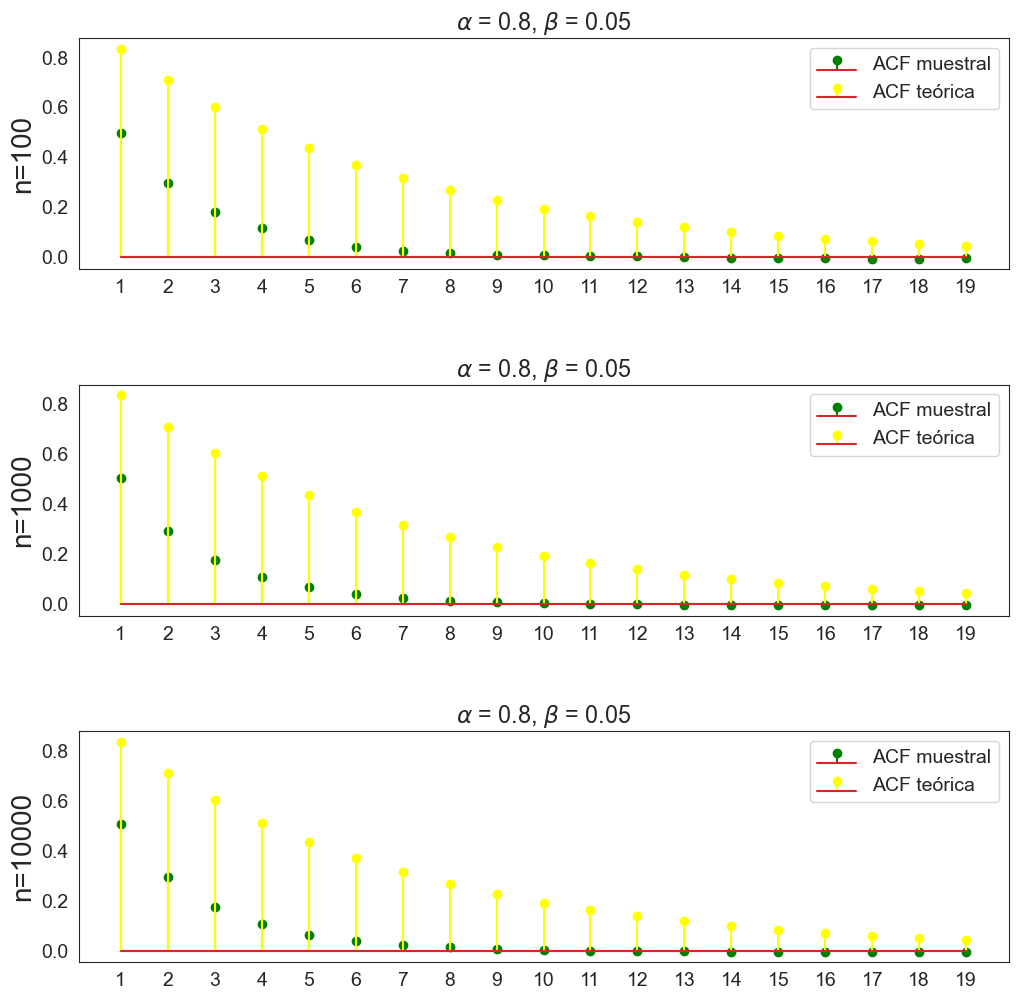

In [216]:
fig, axes = plt.subplots(3,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf3[i],linefmt='green', label='ACF muestral')
    ax.stem(acf3t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[2]}, $\beta$ = {beta[2]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.set_ylabel(fr'n={nn[i]}', fontsize=20)
    ax.legend()
    i=i+1

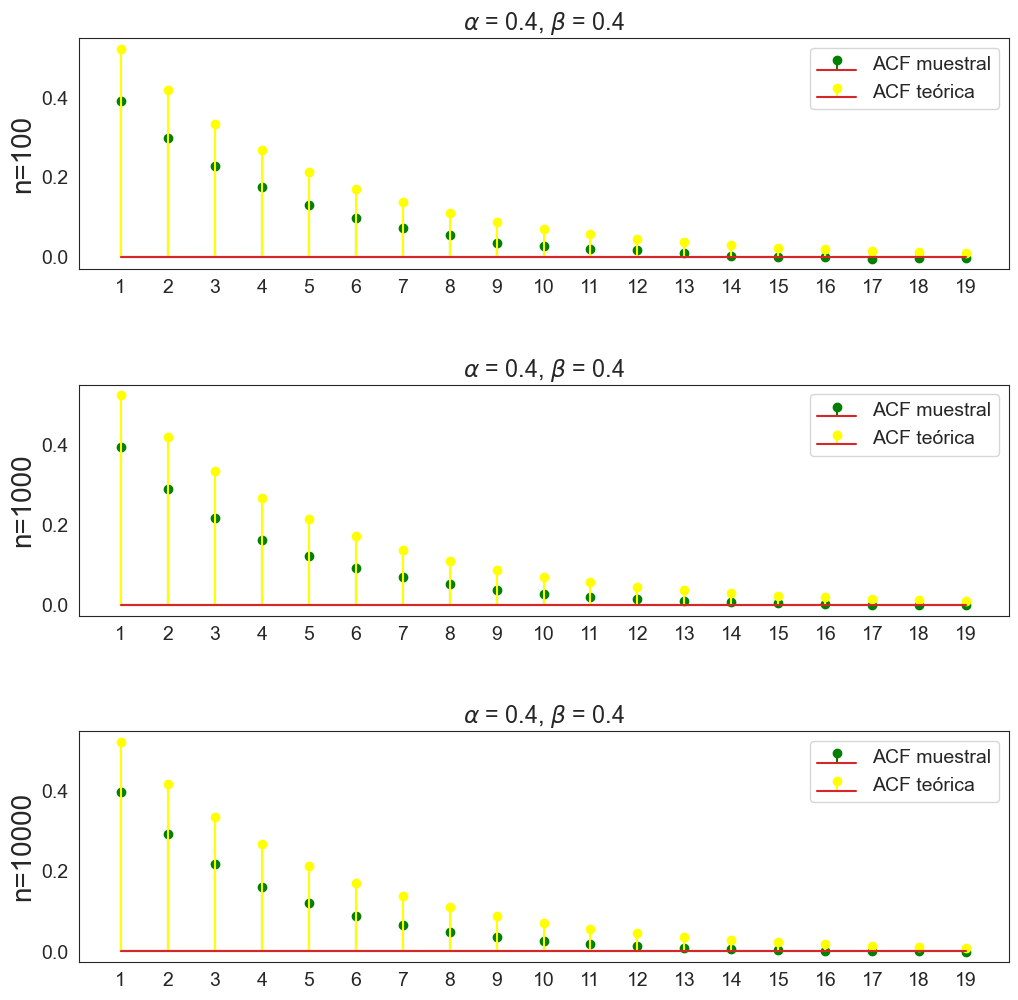

In [217]:
fig, axes = plt.subplots(3,1, figsize=(12, 12))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5) 
i=0
for ax in axes:
    ax.stem(acf4[i],linefmt='green', label='ACF muestral')
    ax.stem(acf4t[i],linefmt='yellow', label = "ACF teórica")
    ax.set_title(fr'$\alpha$ = {alpha[3]}, $\beta$ = {beta[3]}')  
    ax.set_xticks(range(0, 19))
    ax.set_xticklabels(x)
    ax.set_ylabel(fr'n={nn[i]}', fontsize=20)
    ax.legend()
    i=i+1